# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_Xialei_Gao/CLV.csv")


In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor()
params = {"hidden_layer_sizes":[(10,),(20,5,)],
      "activation":["relu","logistic"]}

In [ ]:
grid = GridSearchCV(clf,params,cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5)]})

In [ ]:
print('Best hyperparameters: {}'.format(grid.best_params_))
print('Best score: {}'.format(grid.best_score_))

Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (20, 5)}
Best score: 0.061286842769025095


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(20, 5))

In [ ]:
p_dict = {
    "hidden_layer_sizes" : (10,),
    "activation" : "relu"
}

model = MLPRegressor(**p_dict)

# euilavent to
# MLPRegressor(hidden_layer_sizes = (10,),activation = "relu")

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute in-sample MSE
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('In-sample MSE:', mse_train)

In-sample MSE: 95570822.84551646


In [ ]:
# Compute out-of-sample MSE
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Out-of-sample MSE:', mse_test)

Out-of-sample MSE: 89990126.12843159


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
hidden_layer_sizes = (20, 15)
activation_function = 'relu'

In [ ]:
model = Sequential()

In [ ]:
#input layer
model.add(Dense(hidden_layer_sizes[0], input_dim=X_train.shape[1], activation=activation_function))

#hidden layers
for layer_size in hidden_layer_sizes[1:]:
    model.add(Dense(layer_size, activation=activation_function))

#output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [ ]:
mse_in_sample = model.evaluate(X_train, y_train, verbose=0)
mse_out_of_sample = model.evaluate(X_test, y_test, verbose=0)

print("In-sample MSE: ", mse_in_sample)
print("Out-of-sample MSE: ", mse_out_of_sample)

In-sample MSE:  43475792.0
Out-of-sample MSE:  41441412.0


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
! pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=1a50bb26a1fef2163ff599bb6a3f9870b3b93ed8d286508a6c56c668f594be2b
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import

import tensorflow as tf
from tensorflow.keras.utils import plot_model

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz

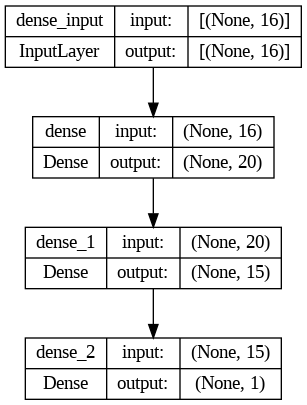

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
ann_viz(model, view=True, filename='network.gv', title='My Neural Network')